In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your dataset
df = pd.read_csv('cs_embed_data.csv')

# Print the first few rows of the dataset to understand its structure
print(df.head())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your dataset
df = pd.read_csv('cs_embed_data.csv')

# Print the first few rows of the dataset to understand its structure
print(df.head())


   cs_embedding_0  cs_embedding_1  cs_embedding_2  cs_embedding_3  \
0       -1.352622        0.740384        1.695514       -0.497450   
1       -1.420214        0.797539        1.748847       -0.571881   
2       -1.368913        0.746200        1.696837       -0.494724   
3       -1.325860        0.712805        1.688298       -0.446775   
4       -1.397093        0.710151        1.714250       -0.499318   

   cs_embedding_4  cs_embedding_5  cs_embedding_6  cs_embedding_7  \
0       -0.253905        0.353409       -1.814524       -0.696089   
1       -0.252812        0.339780       -1.854765       -0.762319   
2       -0.272788        0.368430       -1.816878       -0.685659   
3       -0.250683        0.383207       -1.807236       -0.798903   
4       -0.246139        0.346471       -1.803934       -0.688617   

   cs_embedding_8  cs_embedding_9  ...  cs_embedding_759  cs_embedding_760  \
0        0.060398       -0.253734  ...         -1.643903          0.339702   
1        0.020

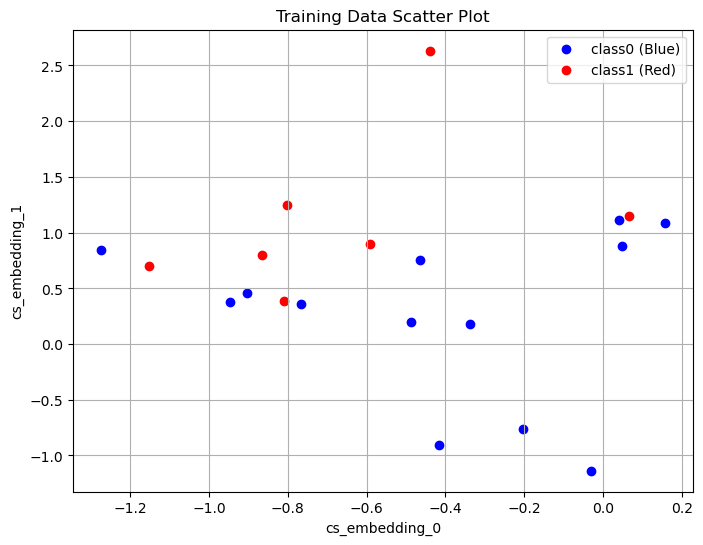

In [9]:

#A3
# Create synthetic class labels for demonstration purposes
# Randomly assign class 0 or 1 for 20 data points
np.random.seed(42)
X_train = df[['cs_embedding_0', 'cs_embedding_1']].sample(n=20, random_state=42).values
y_train = np.random.randint(0, 2, 20)  # Randomly assigning class 0 or 1

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='class0 (Blue)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='class1 (Red)')
plt.xlabel('cs_embedding_0')
plt.ylabel('cs_embedding_1')
plt.title('Training Data Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


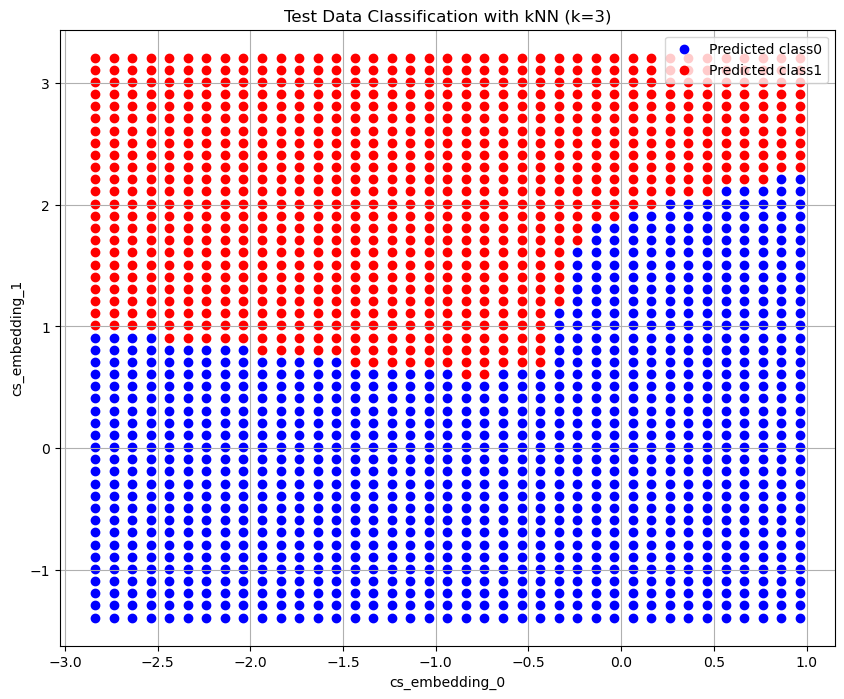

In [10]:
#A4
# Generate test data
x_range = np.arange(df['cs_embedding_0'].min(), df['cs_embedding_0'].max(), 0.1)
y_range = np.arange(df['cs_embedding_1'].min(), df['cs_embedding_1'].max(), 0.1)
X_test = np.array([[x, y] for x in x_range for y in y_range])

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict class for test data
y_test_pred = knn.predict(X_test)

# Scatter plot of the test data
plt.figure(figsize=(10, 8))
plt.scatter(X_test[y_test_pred == 0][:, 0], X_test[y_test_pred == 0][:, 1], color='blue', label='Predicted class0')
plt.scatter(X_test[y_test_pred == 1][:, 0], X_test[y_test_pred == 1][:, 1], color='red', label='Predicted class1')
plt.xlabel('cs_embedding_0')
plt.ylabel('cs_embedding_1')
plt.title('Test Data Classification with kNN (k=3)')
plt.legend()
plt.grid(True)
plt.show()


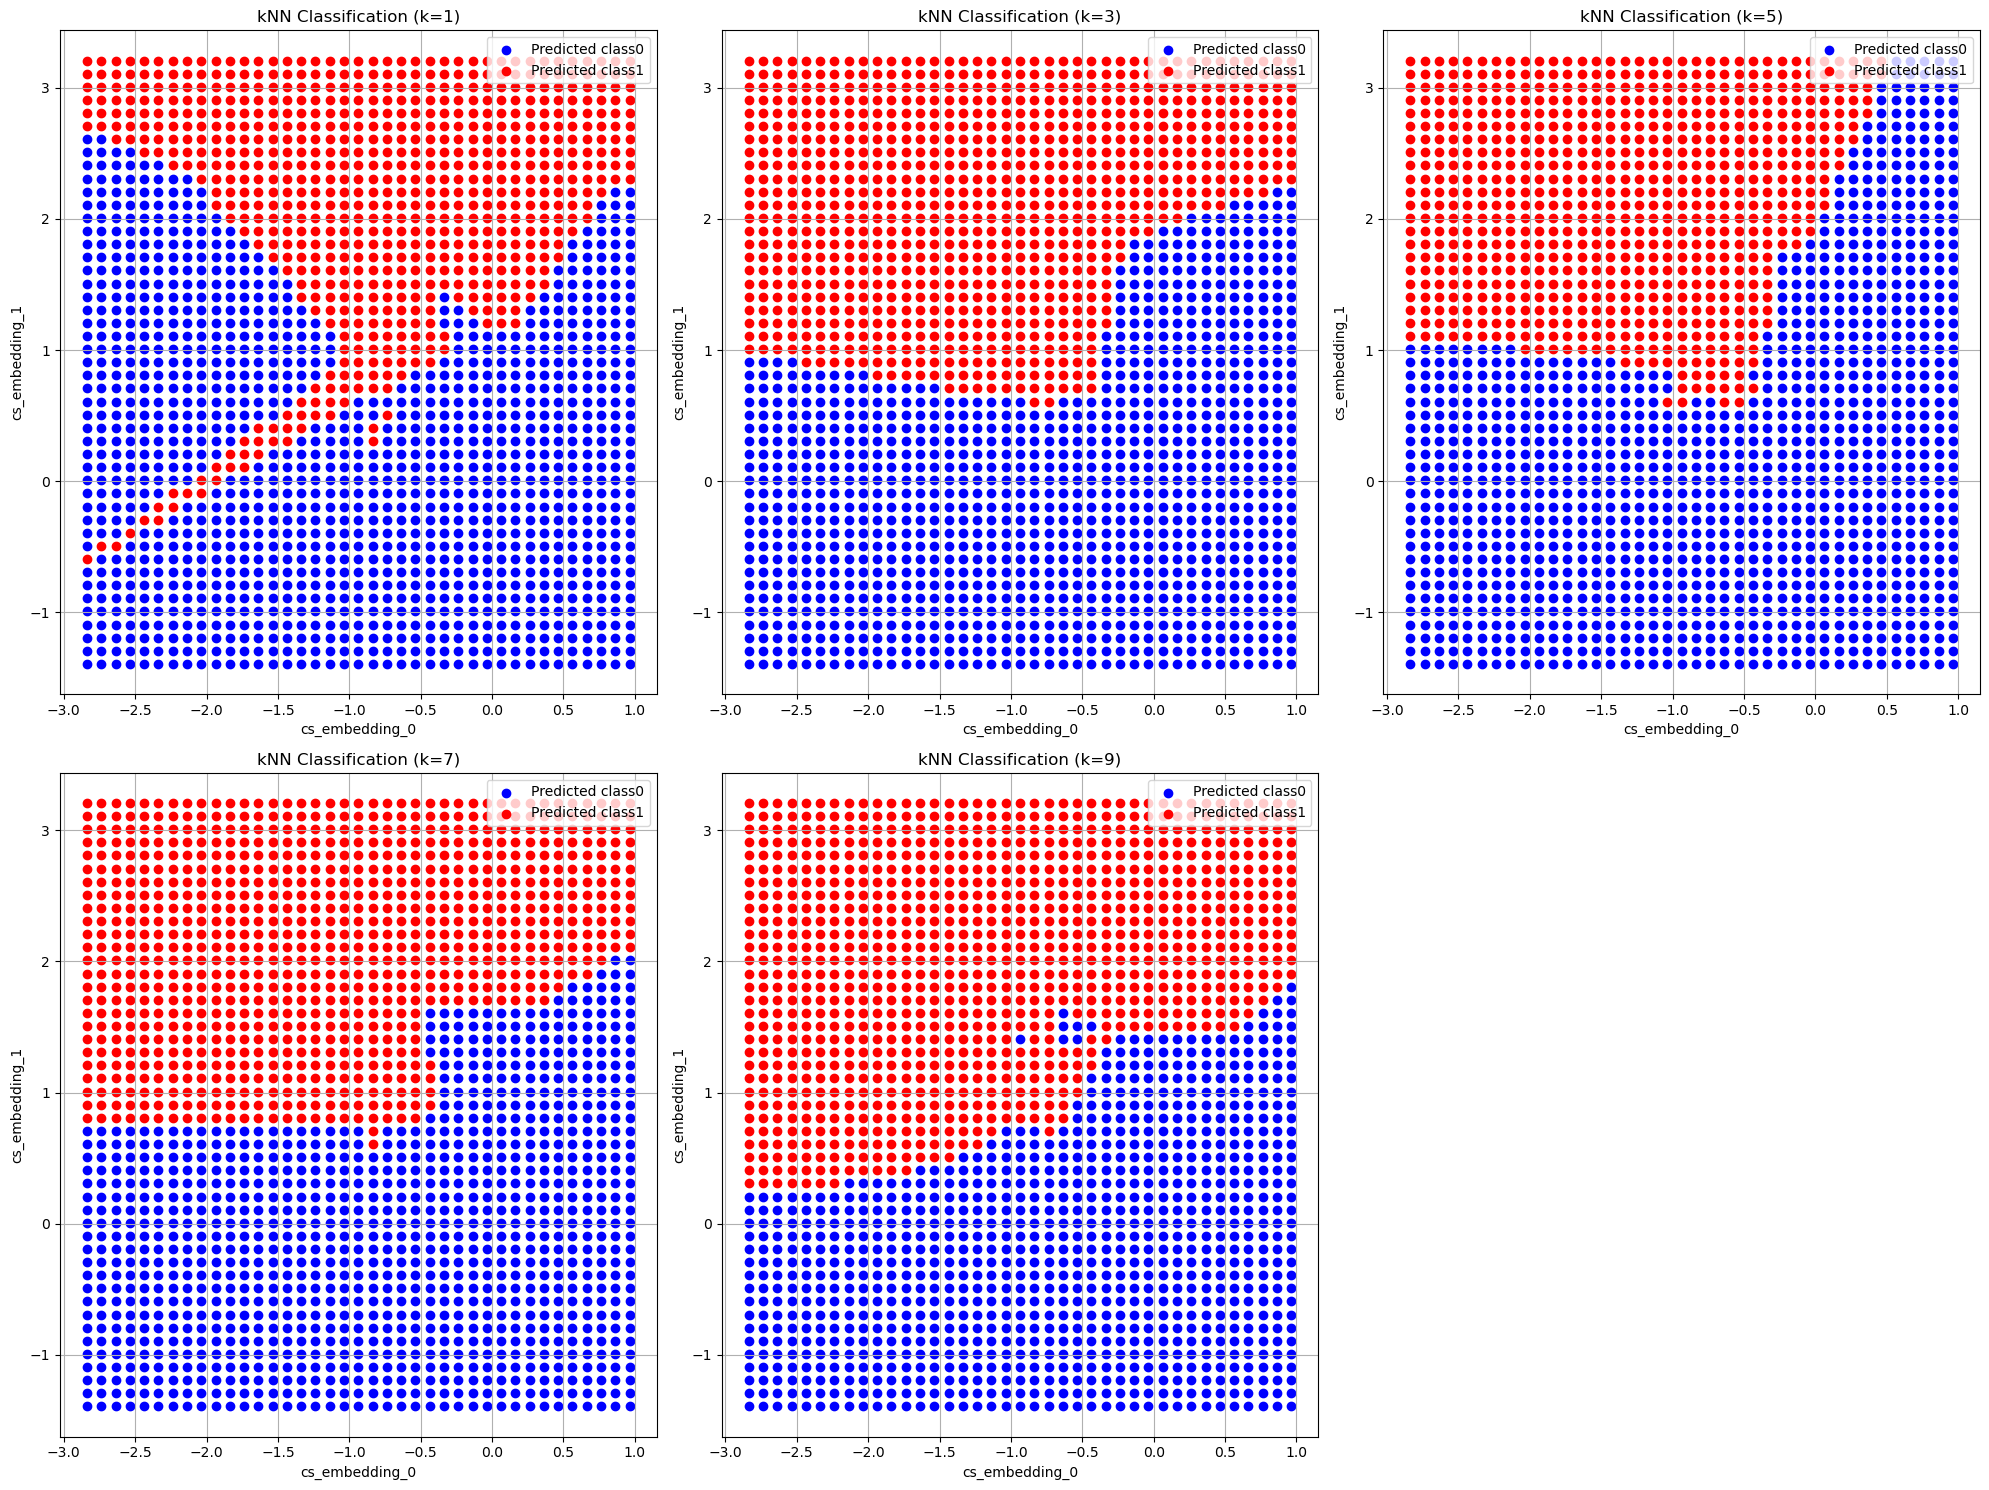

In [11]:
#A5
k_values = [1, 3, 5, 7, 9]
plt.figure(figsize=(20, 15))

for i, k in enumerate(k_values, 1):
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict class for test data
    y_test_pred = knn.predict(X_test)

    # Scatter plot of the test data
    plt.subplot(2, 3, i)
    plt.scatter(X_test[y_test_pred == 0][:, 0], X_test[y_test_pred == 0][:, 1], color='blue', label='Predicted class0')
    plt.scatter(X_test[y_test_pred == 1][:, 0], X_test[y_test_pred == 1][:, 1], color='red', label='Predicted class1')
    plt.xlabel('cs_embedding_0')
    plt.ylabel('cs_embedding_1')
    plt.title(f'kNN Classification (k={k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


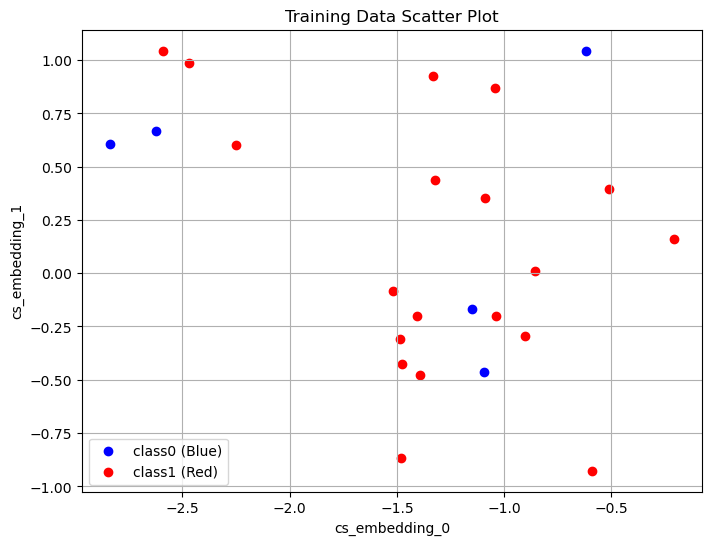

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


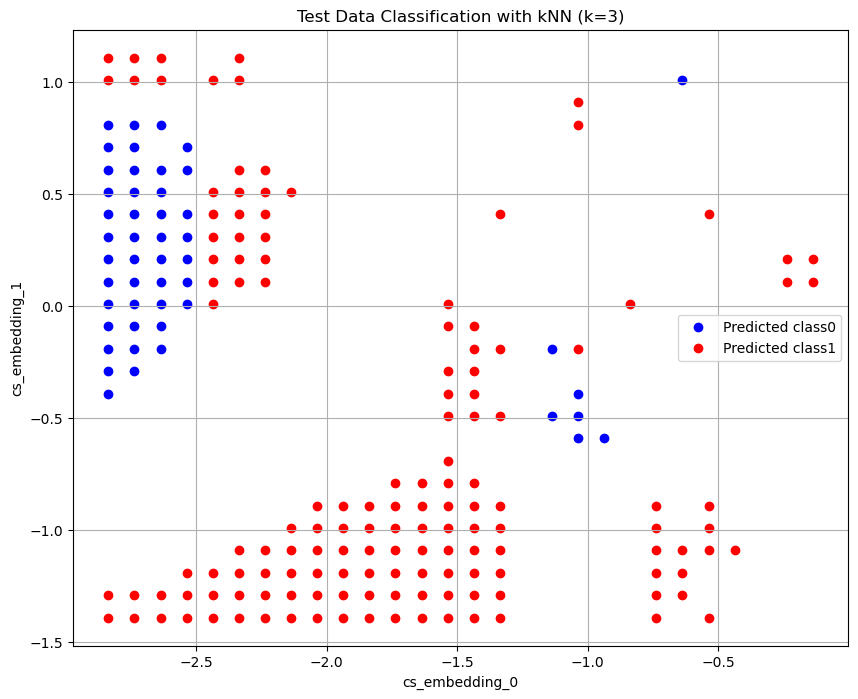

In [14]:
#A6
# Use features cs_embedding_0 and cs_embedding_1 for classification
# Replace 'target' with your actual target column name
X = df[['cs_embedding_0', 'cs_embedding_1']]
y = df['Final_Marks']  # Replace 'target' with the actual column name for class labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0]['cs_embedding_0'], X_train[y_train == 0]['cs_embedding_1'], color='blue', label='class0 (Blue)')
plt.scatter(X_train[y_train == 1]['cs_embedding_0'], X_train[y_train == 1]['cs_embedding_1'], color='red', label='class1 (Red)')
plt.xlabel('cs_embedding_0')
plt.ylabel('cs_embedding_1')
plt.title('Training Data Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

# Generate test data for classification
x_range = np.arange(X['cs_embedding_0'].min(), X['cs_embedding_0'].max(), 0.1)
y_range = np.arange(X['cs_embedding_1'].min(), X['cs_embedding_1'].max(), 0.1)
X_test_grid = np.array([[x, y] for x in x_range for y in y_range])

# Classify and plot
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test_grid)

plt.figure(figsize=(10, 8))
plt.scatter(X_test_grid[y_test_pred == 0][:, 0], X_test_grid[y_test_pred == 0][:, 1], color='blue', label='Predicted class0')
plt.scatter(X_test_grid[y_test_pred == 1][:, 0], X_test_grid[y_test_pred == 1][:, 1], color='red', label='Predicted class1')
plt.xlabel('cs_embedding_0')
plt.ylabel('cs_embedding_1')
plt.title('Test Data Classification with kNN (k=3)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#A7
# Define parameter grid for kNN
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameter and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Best k: 9
Best Cross-Validation Score: 0.6500
